In [1]:
!pip install --upgrade ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.0/950.0 kB 26.3 MB/s eta 0:00:0000:01


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Uh4FyaAU1EVvux91YQzf")
project = rf.workspace("musa-yilmaz-cuawb").project("yolov8-skin-disease-detection")
version = project.version(1)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 84.5 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.10.0 requires tensorflow==2.17.0, but you have tensorflow 2.17.1 which is incompatible.
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Yolov8-skin-disease-detection-1 in yolov11:: 100%|██████████| 2522/2522 [00:00<00:00, 8453.10it/s]


In [3]:
from ultralytics import YOLO

#loading classification model
model = YOLO('yolo11m.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 38.8M/38.8M [00:00<00:00, 282MB/s]


In [6]:
!nvidia-smi

Sun Mar 30 00:53:31 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   35C    P8              9W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [9]:
!cat /kaggle/working/Yolov8-skin-disease-detection-1/data.yaml

train: /kaggle/working/Yolov8-skin-disease-detection-1/train
val: /kaggle/working/Yolov8-skin-disease-detection-1/valid
test: /kaggle/working/Yolov8-skin-disease-detection-1/test

nc: 9
names: ['acne', 'eczema', 'herpes zoster', 'hives', 'lupus', 'object', 'raynauds', 'tinea', 'vitiligo']

roboflow:
  workspace: musa-yilmaz-cuawb
  project: yolov8-skin-disease-detection
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/musa-yilmaz-cuawb/yolov8-skin-disease-detection/dataset/1


In [8]:
%%writefile /kaggle/working/Yolov8-skin-disease-detection-1/data.yaml
train: /kaggle/working/Yolov8-skin-disease-detection-1/train
val: /kaggle/working/Yolov8-skin-disease-detection-1/valid
test: /kaggle/working/Yolov8-skin-disease-detection-1/test

nc: 9
names: ['acne', 'eczema', 'herpes zoster', 'hives', 'lupus', 'object', 'raynauds', 'tinea', 'vitiligo']

roboflow:
  workspace: musa-yilmaz-cuawb
  project: yolov8-skin-disease-detection
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/musa-yilmaz-cuawb/yolov8-skin-disease-detection/dataset/1

Overwriting /kaggle/working/Yolov8-skin-disease-detection-1/data.yaml


In [11]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.98 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6170.1/8062.4 GB disk)


In [12]:
from ultralytics import YOLO
from IPython.display import Image

In [14]:
!yolo task=detect mode=train data=/kaggle/working/Yolov8-skin-disease-detection-1/data.yaml model="yolo11l.pt" epochs=50000 imgsz=640 patience=25 batch=32 workers=10 device=[0,1]

100%|███████████████████████████████████████| 49.0M/49.0M [00:00<00:00, 230MB/s]
Ultralytics 8.3.98 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
                                                       CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11l.pt, data=/kaggle/working/Yolov8-skin-disease-detection-1/data.yaml, epochs=50000, time=None, patience=25, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=[0, 1], workers=10, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augme

https://universe.roboflow.com/musa-yilmaz-cuawb/yolov8-skin-disease-detection/dataset/1

# Inference

In [15]:
from IPython.display import Image

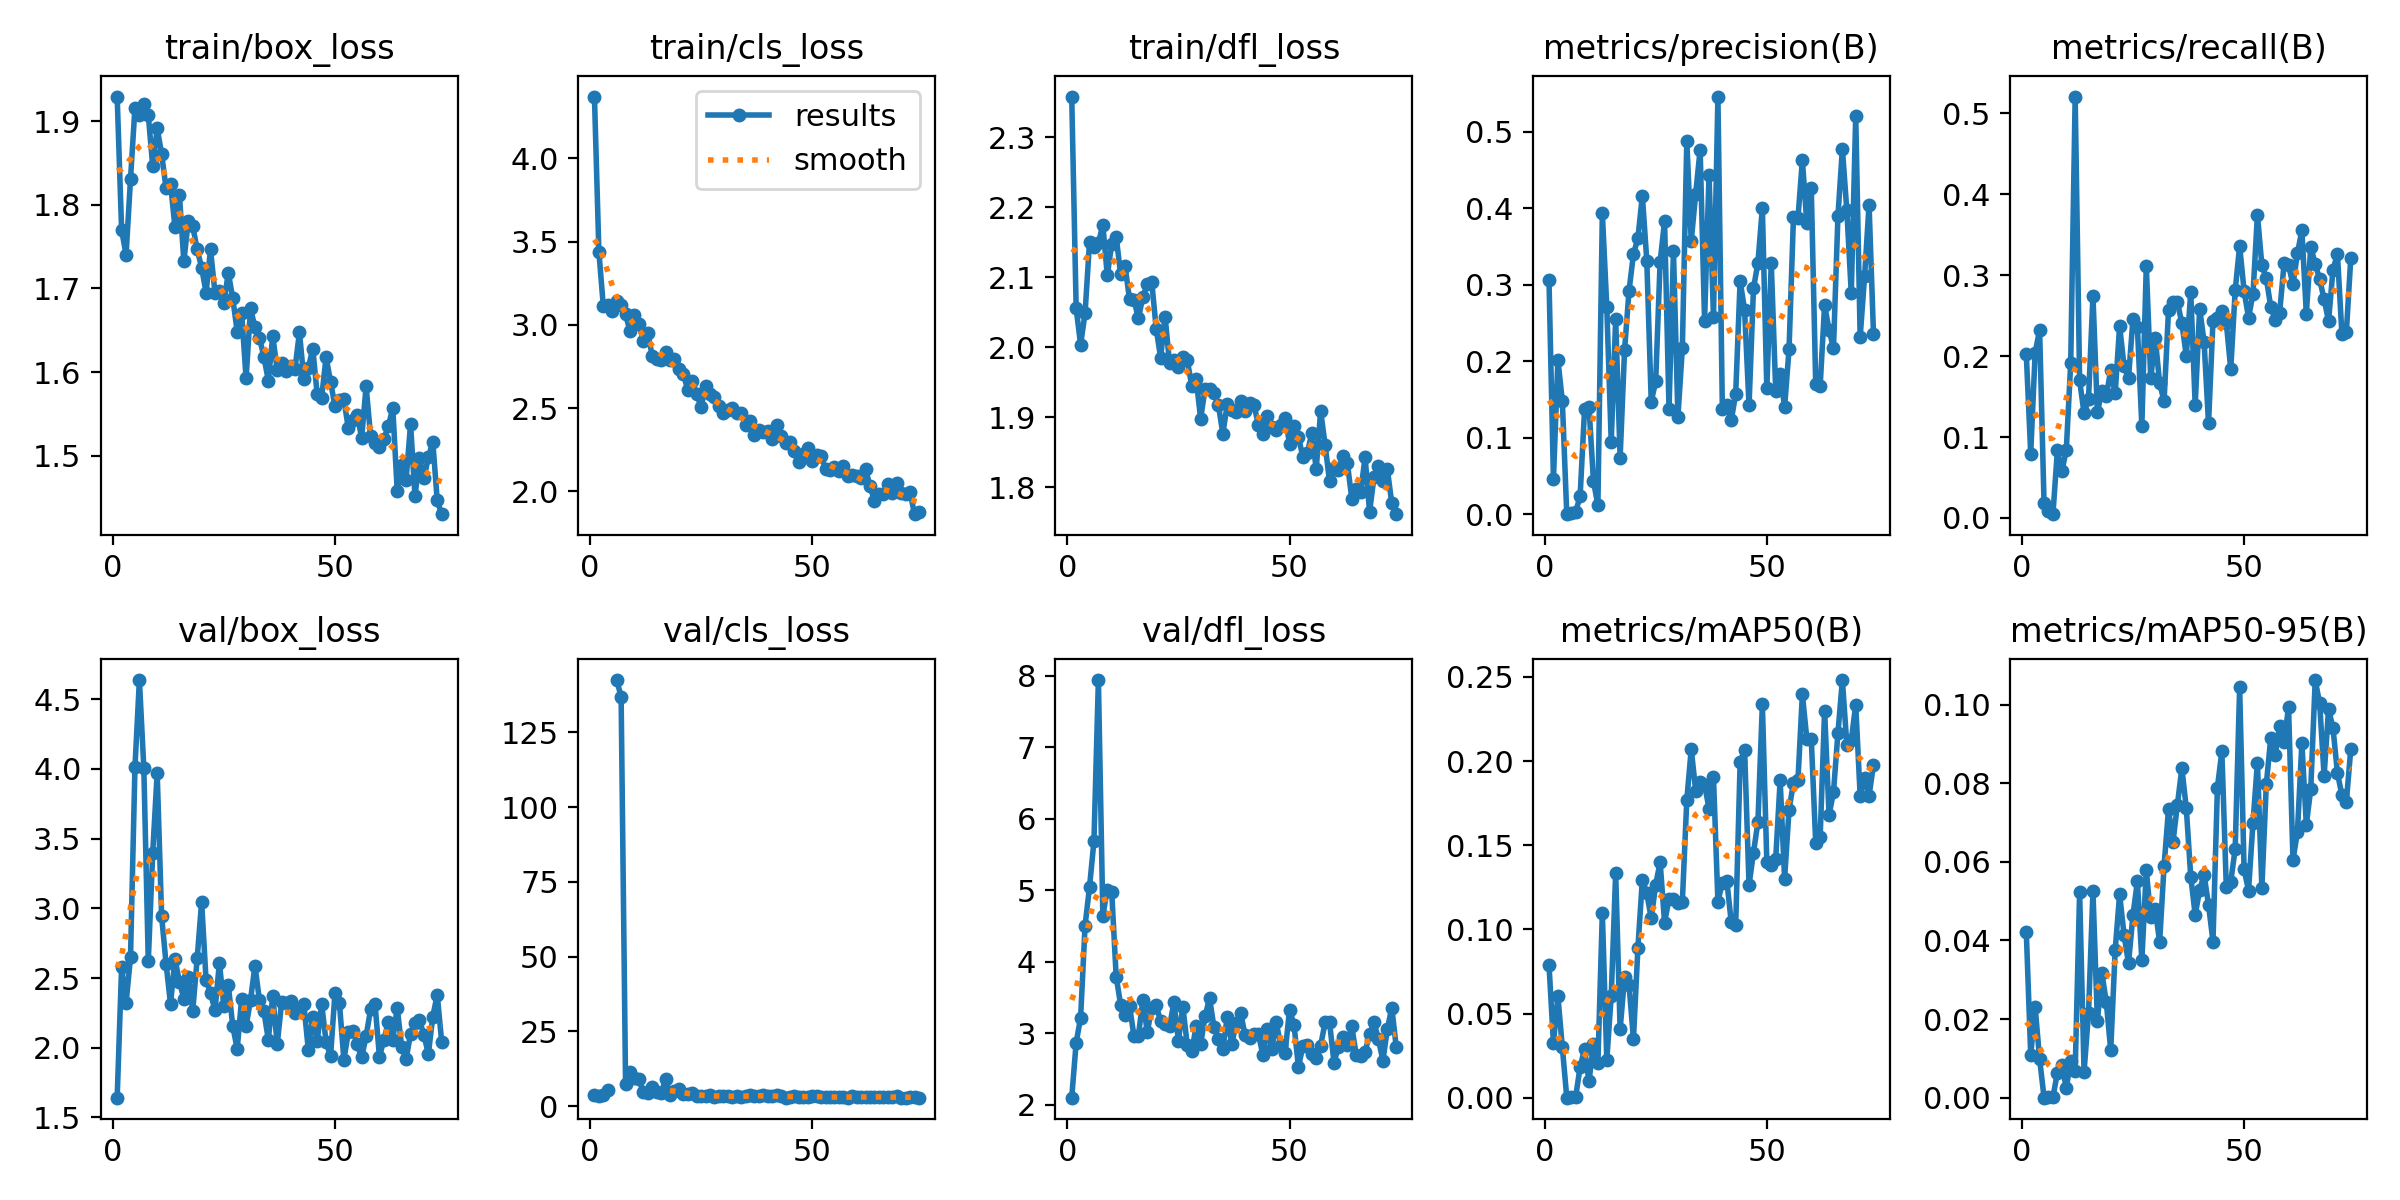

In [19]:

Image("/kaggle/working/runs/detect/train2/results.png", width=1500)

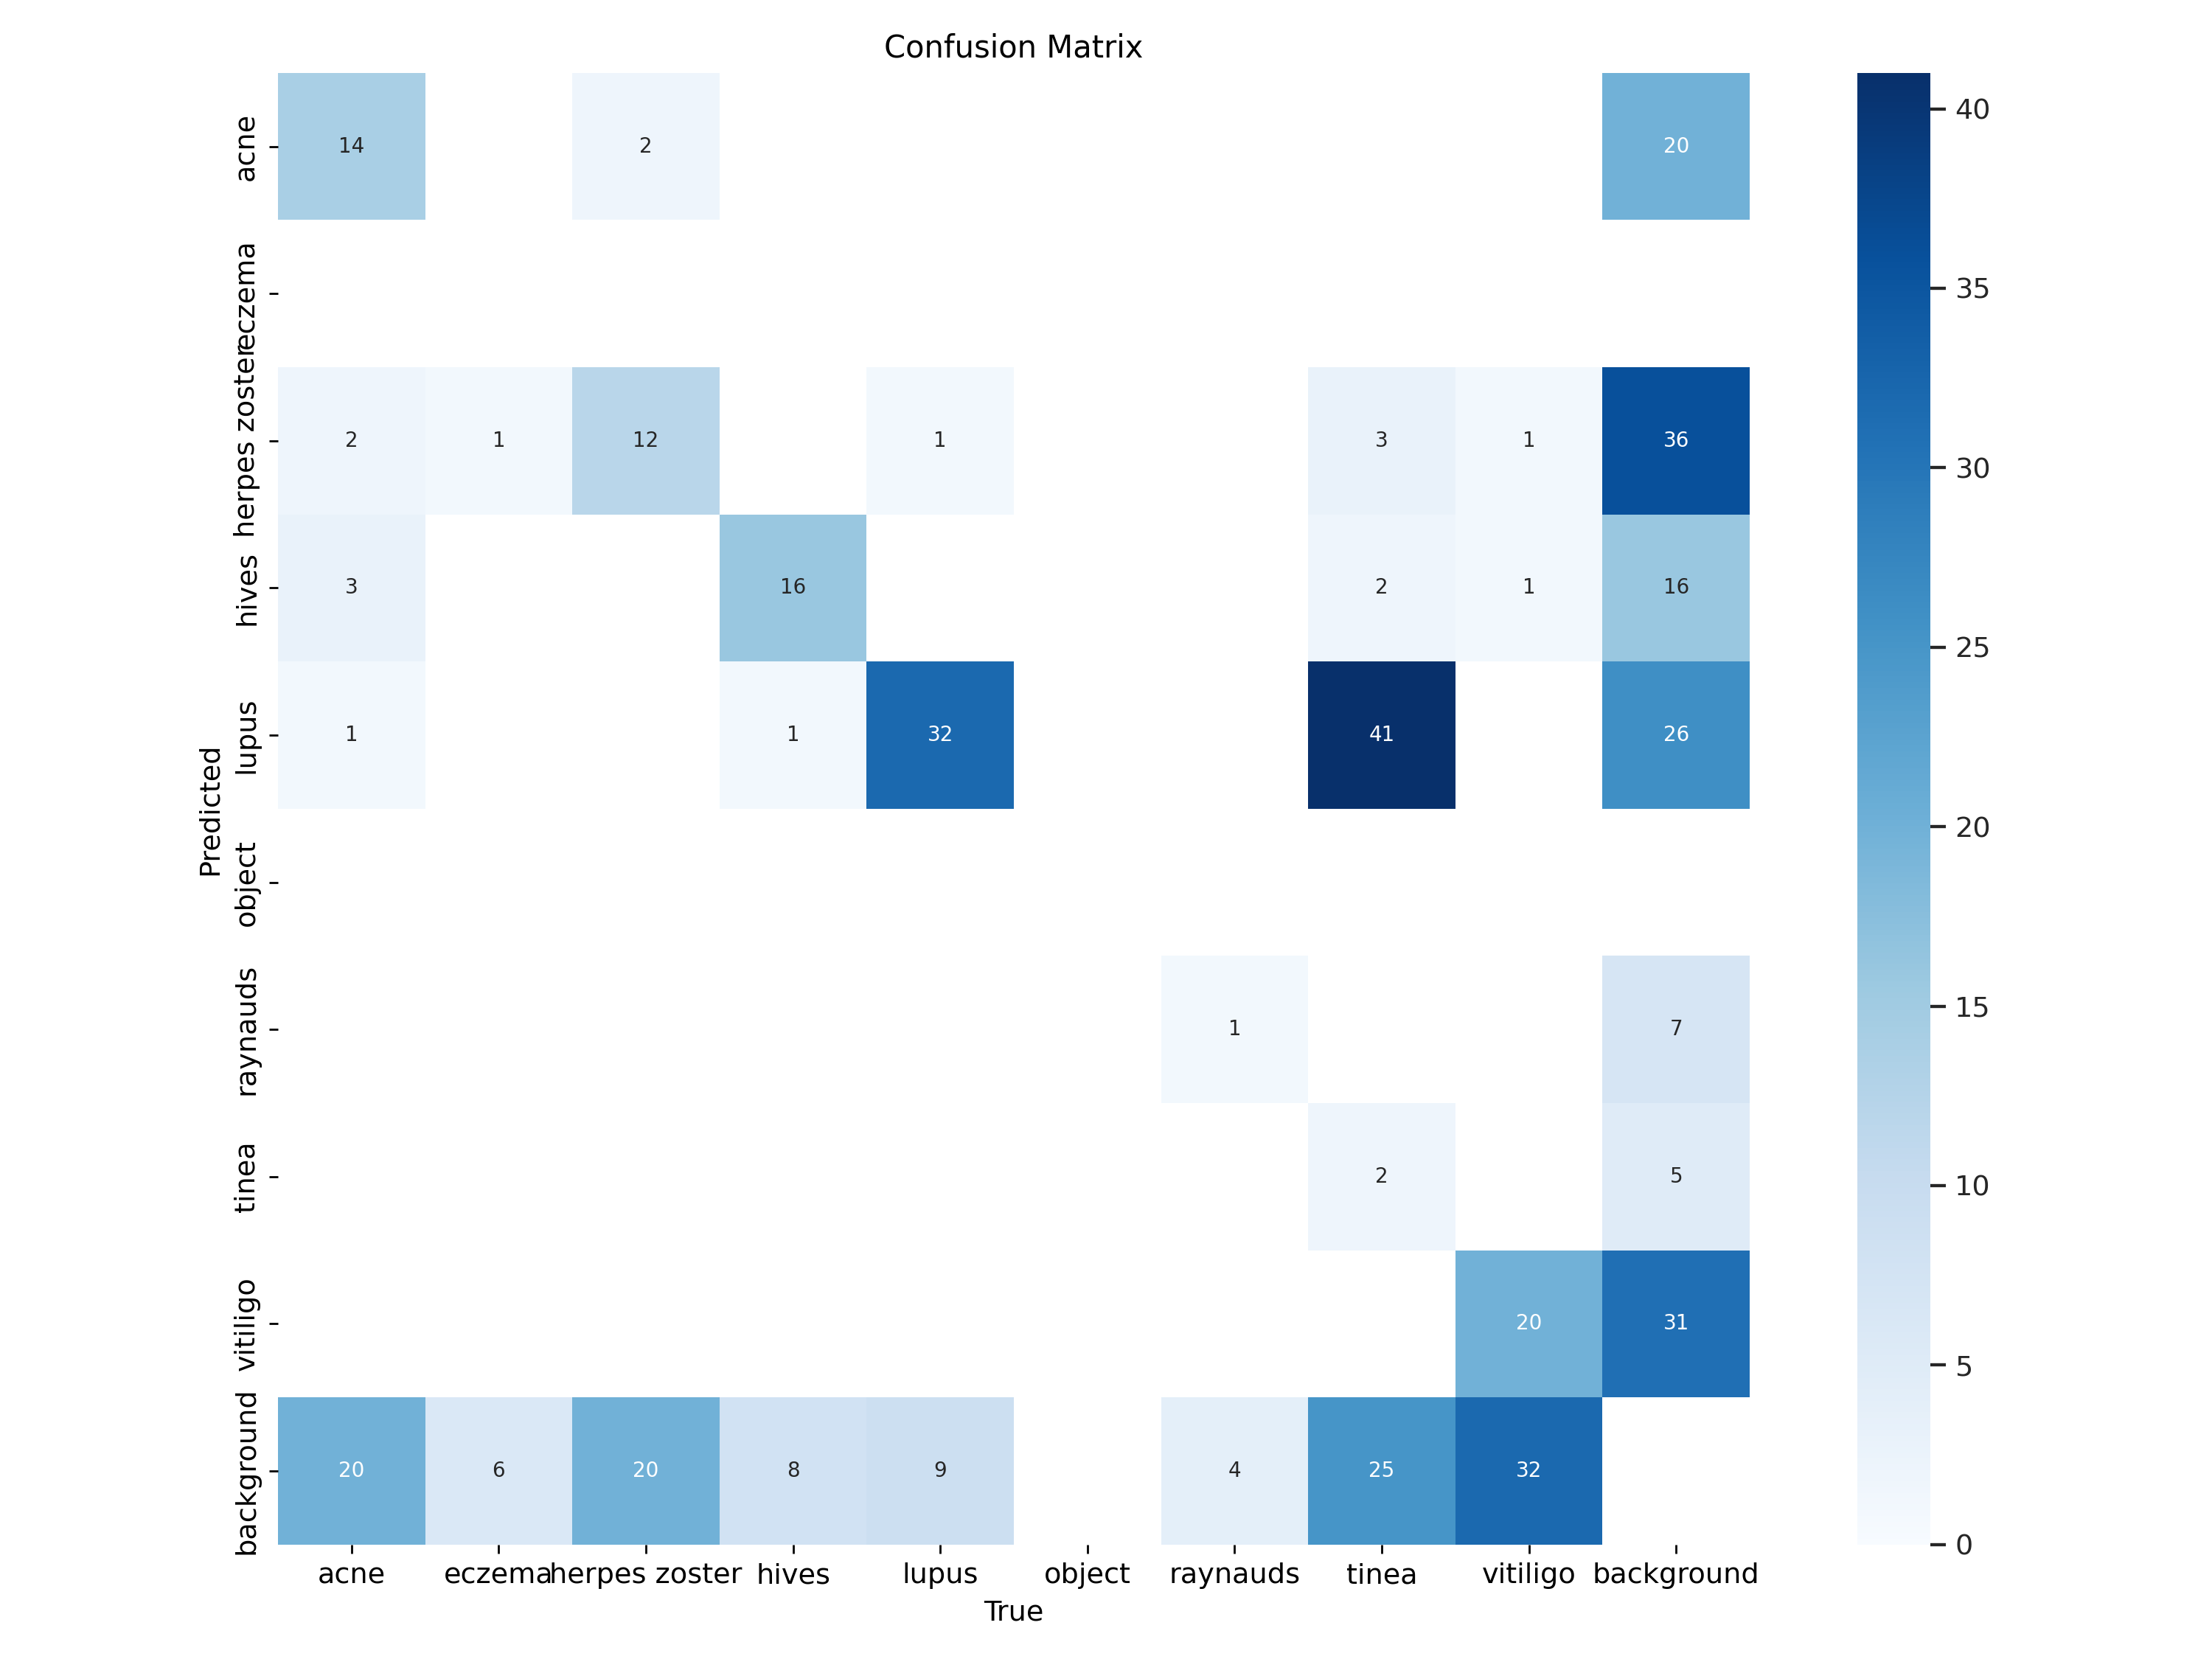

In [21]:
Image("/kaggle/working/runs/detect/train2/confusion_matrix.png", width=1500)

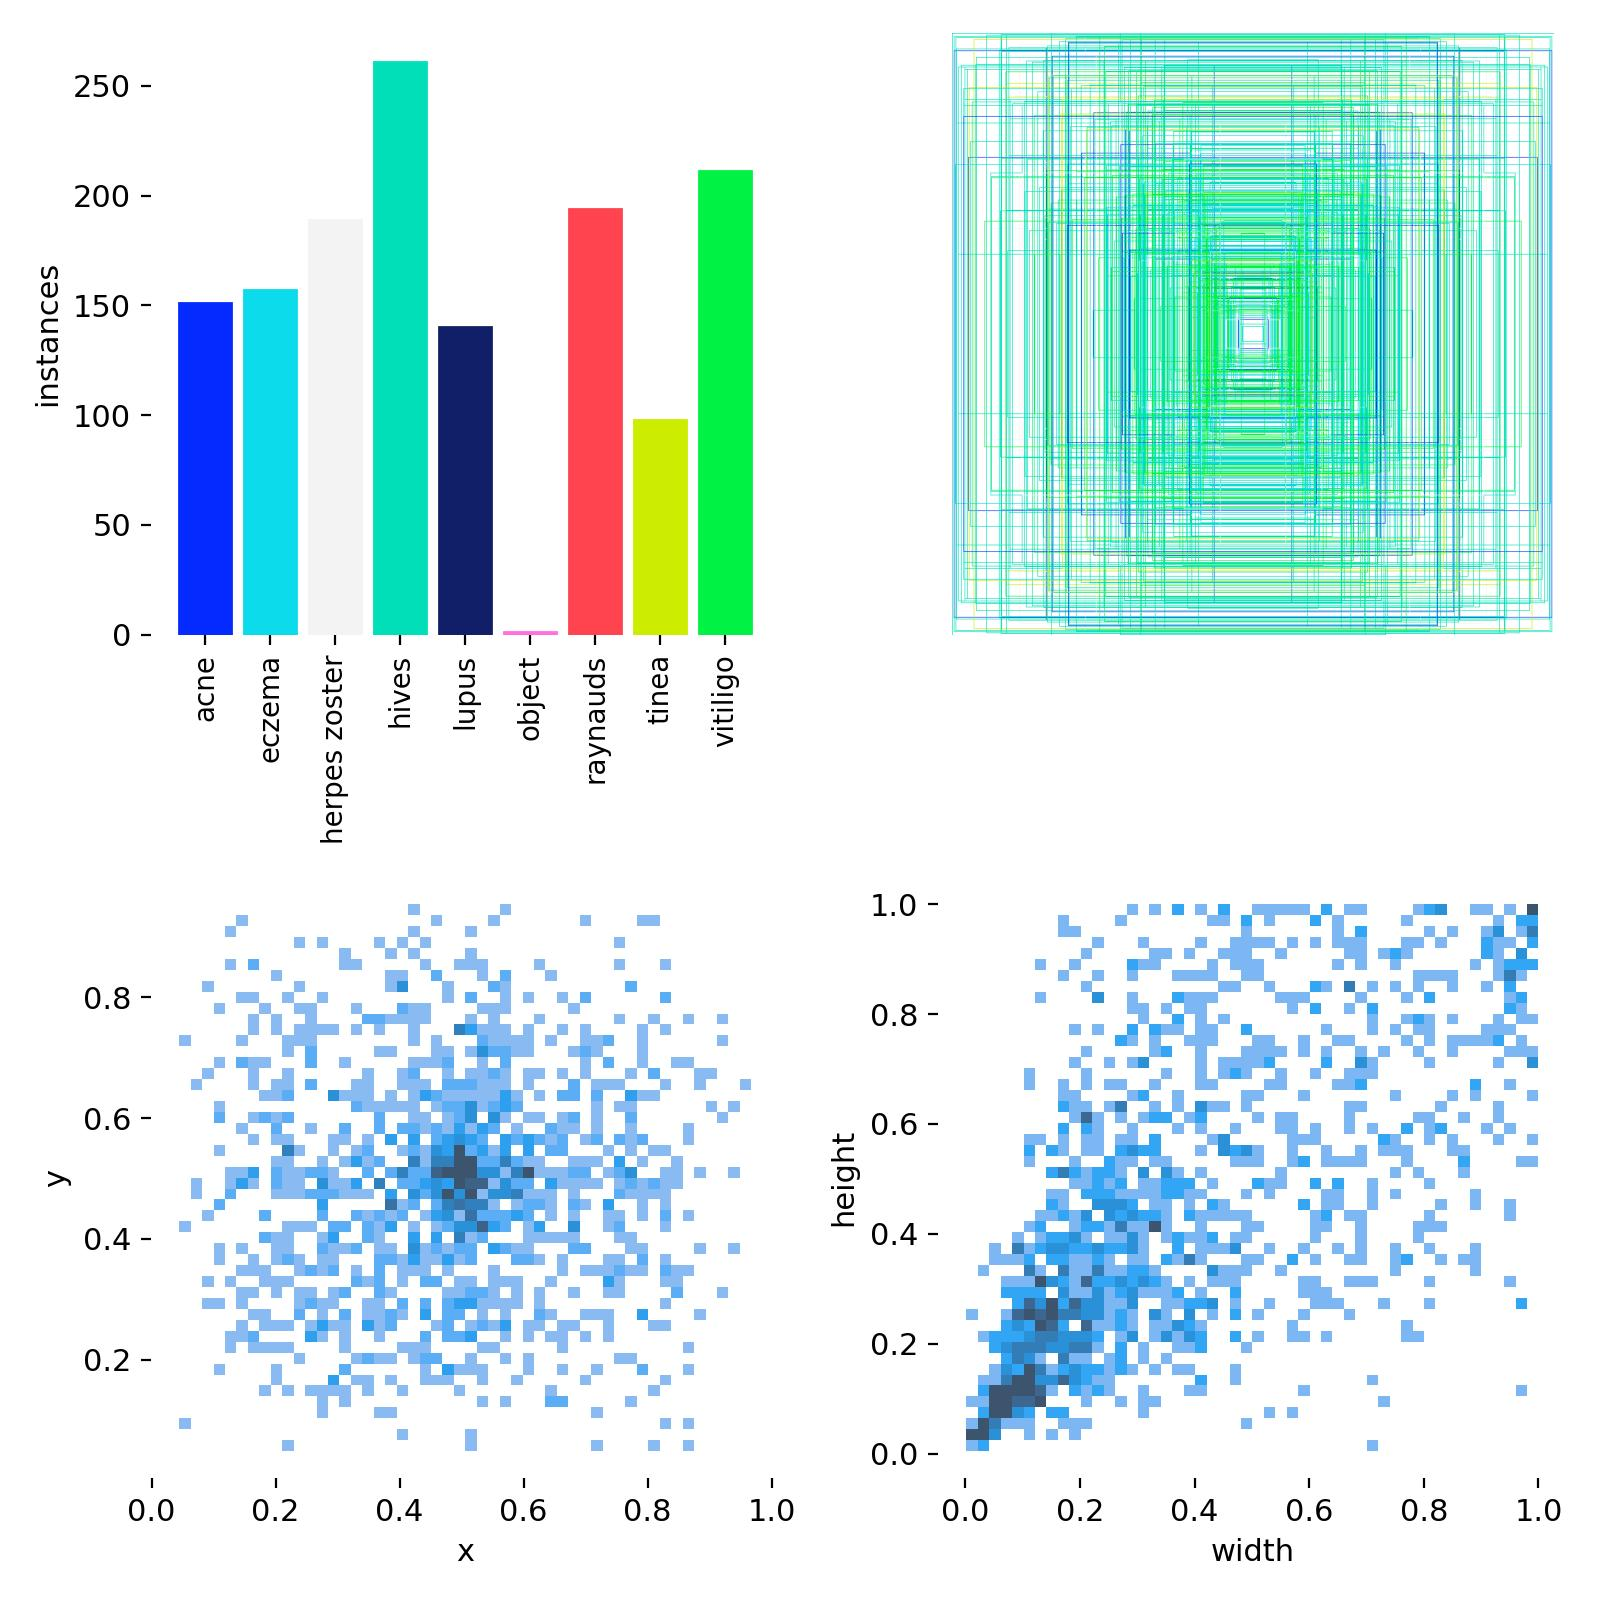

In [22]:
Image("/kaggle/working/runs/detect/train2/labels.jpg", width=1500)

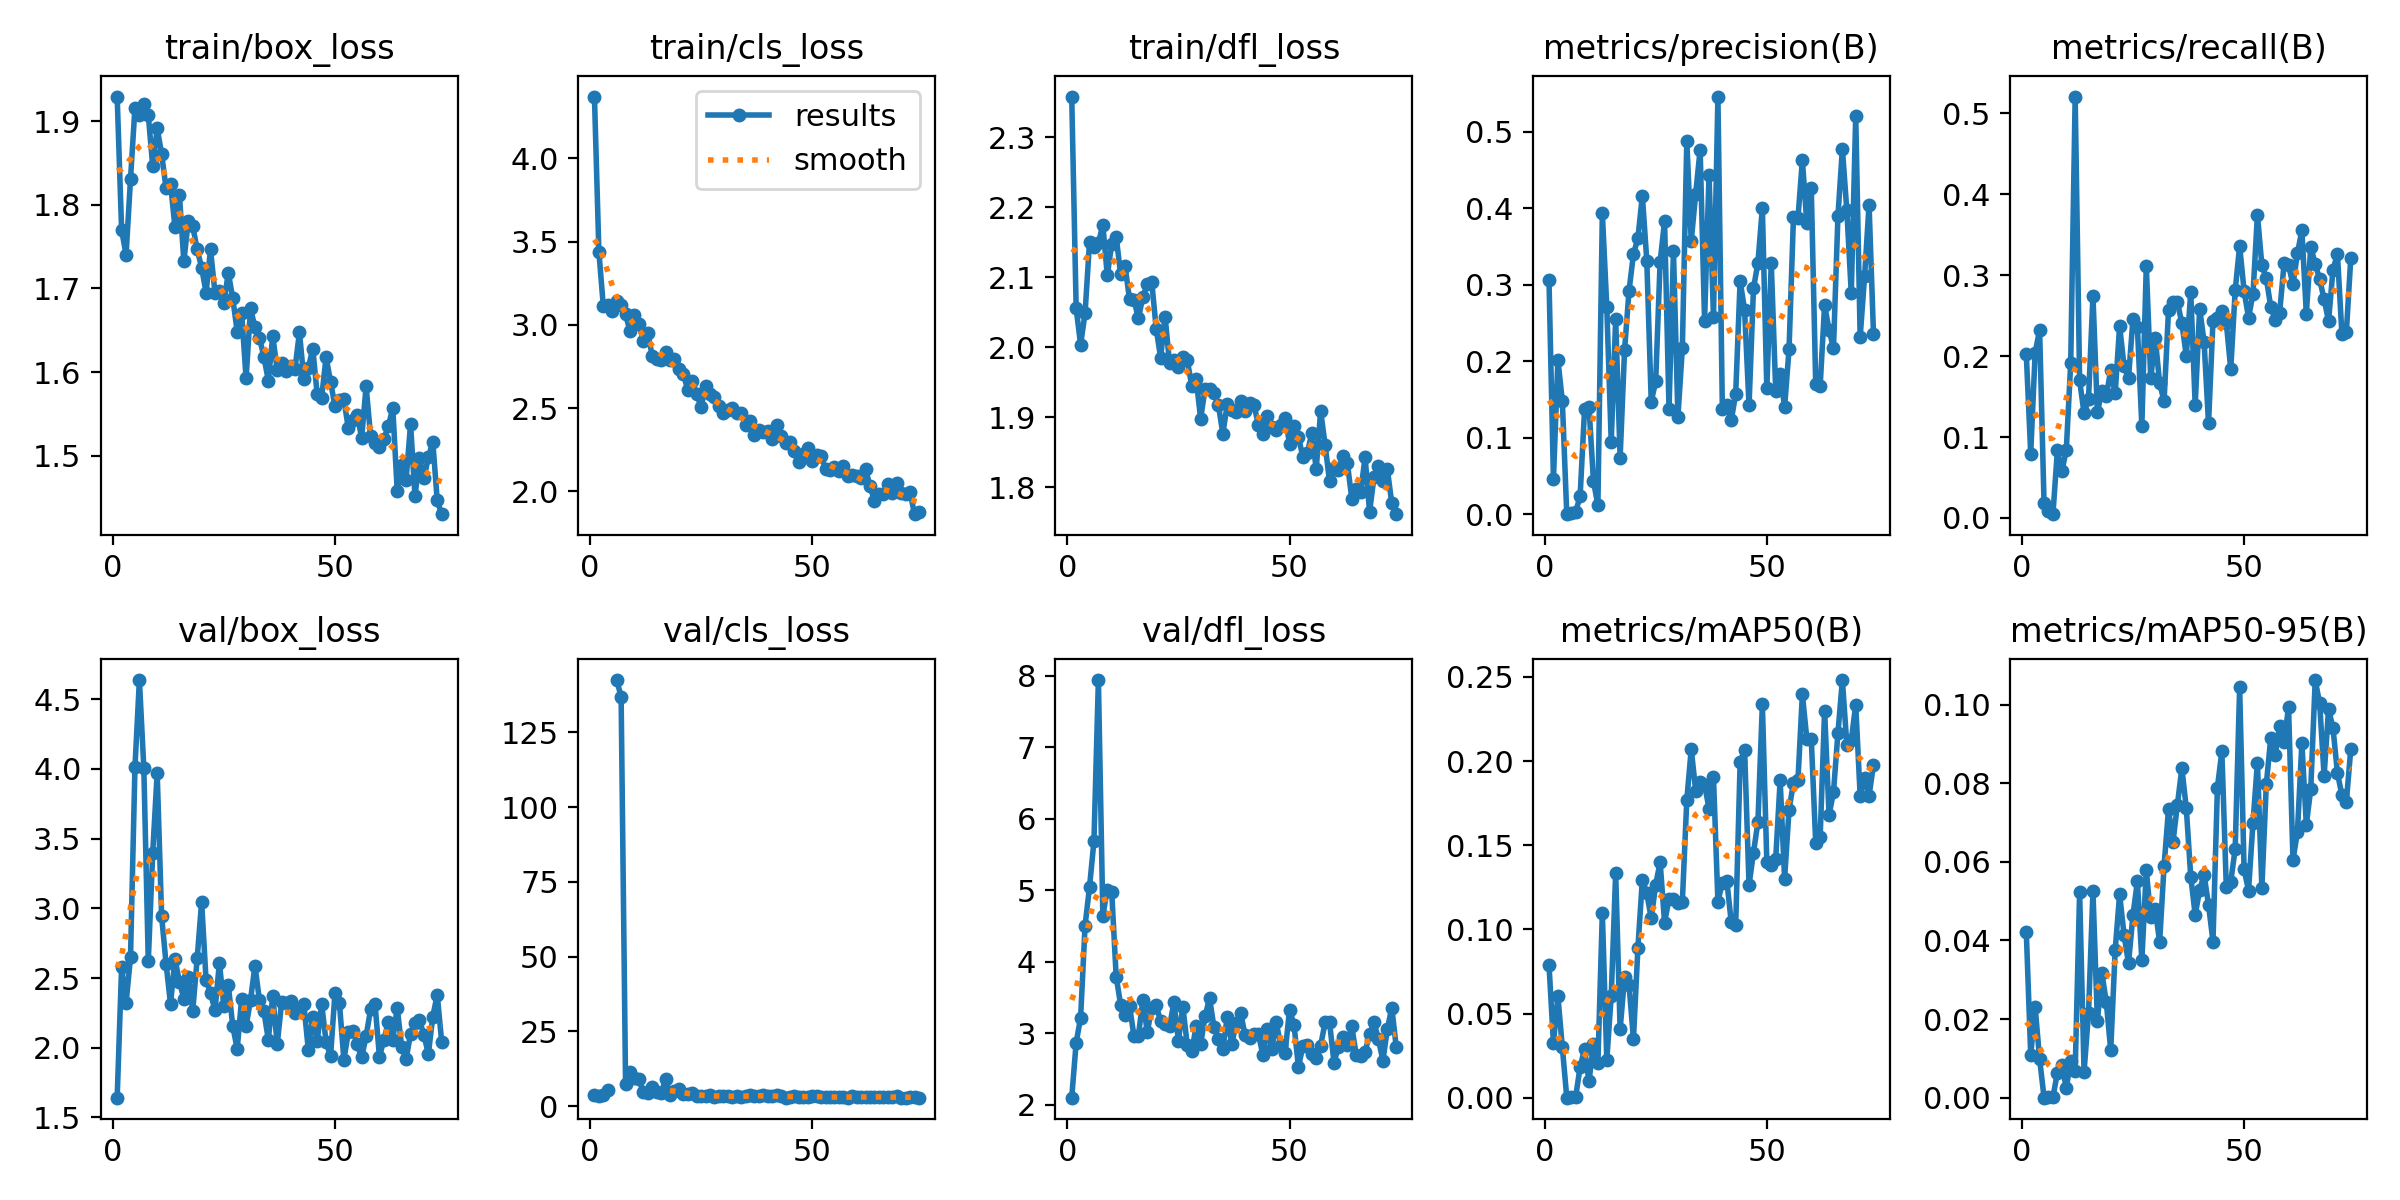

In [23]:
Image("/kaggle/working/runs/detect/train2/results.png", width=600)

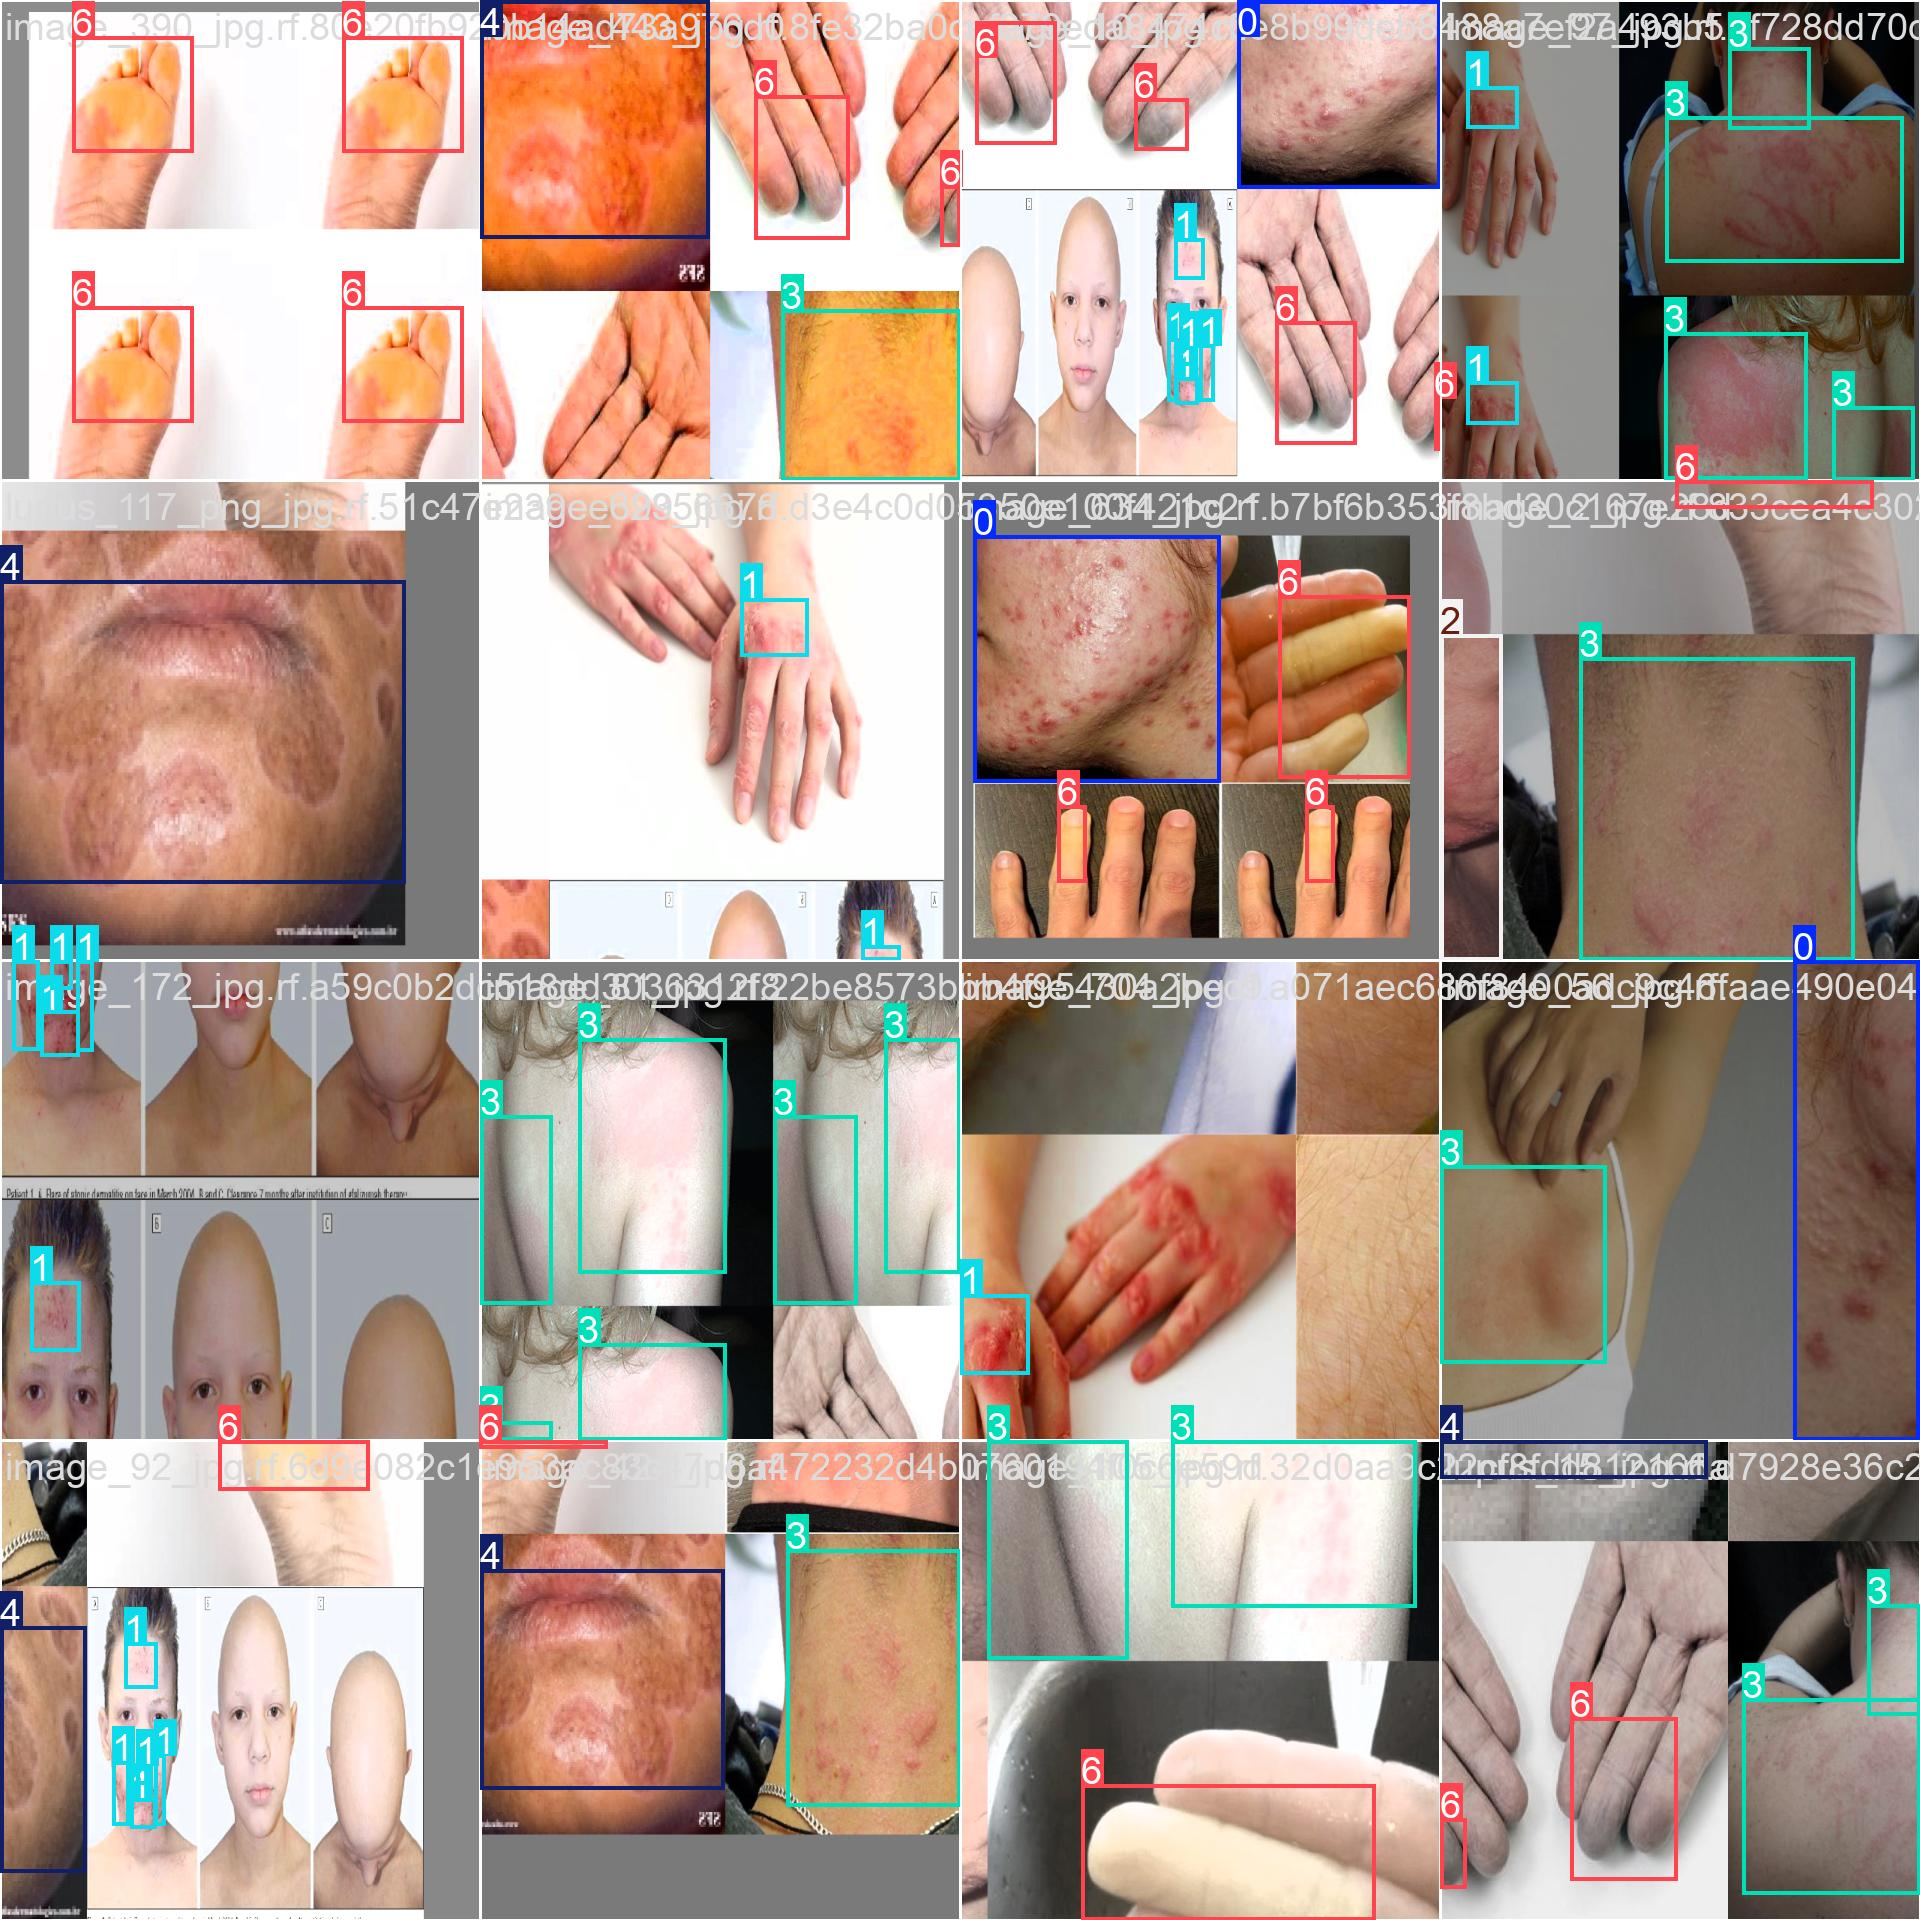

In [24]:
Image("/kaggle/working/runs/detect/train2/train_batch0.jpg", width=1500)

In [28]:
!yolo task=detect mode=predict model="/kaggle/working/runs/detect/train2/weights/best.pt" conf=0.25 source=/kaggle/working/Yolov8-skin-disease-detection-1/test/images save=True

Ultralytics 8.3.98 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l summary (fused): 190 layers, 25,286,251 parameters, 0 gradients, 86.6 GFLOPs

image 1/114 /kaggle/working/Yolov8-skin-disease-detection-1/test/images/image_108_jpg.rf.c7af0d0686051e52781e558548b39950.jpg: 640x640 (no detections), 47.4ms
image 2/114 /kaggle/working/Yolov8-skin-disease-detection-1/test/images/image_111_jpg.rf.d36df45ccb785d189481739924d78a95.jpg: 640x640 1 herpes zoster, 47.4ms
image 3/114 /kaggle/working/Yolov8-skin-disease-detection-1/test/images/image_113_jpg.rf.606fbafe450f7788e212e20e1592e5f2.jpg: 640x640 2 herpes zosters, 40.5ms
image 4/114 /kaggle/working/Yolov8-skin-disease-detection-1/test/images/image_118_jpg.rf.c141e0da7a631bd485d1d75156fe4055.jpg: 640x640 1 herpes zoster, 40.4ms
image 5/114 /kaggle/working/Yolov8-skin-disease-detection-1/test/images/image_11_jpg.rf.bd6d6f18b25cba76d434bb8eb81ed49c.jpg: 640x640 1 acne, 40.5ms
image 6/114 /kaggle/working/Yolov8-skin-diseas

In [29]:
import shutil
import os

def zip_folder(folder_path, output_zip=None):
    """
    Zips the given folder and saves it in the same location or a custom output location.

    Args:
        folder_path (str): Path to the folder to be zipped.
        output_zip (str, optional): Custom output path for the zip file (without extension). 
                                    If None, the zip will be created in the same folder.
    
    Returns:
        str: Path to the created zip file.
    """
    folder_path = os.path.abspath(folder_path)  # Ensure absolute path
    if not os.path.isdir(folder_path):
        raise ValueError(f"Error: '{folder_path}' is not a valid directory.")

    # Default zip file name (same folder name)
    if output_zip is None:
        output_zip = folder_path  # Save in the same location

    # Create the zip file
    zip_path = shutil.make_archive(output_zip, 'zip', folder_path)
    print(f"✅ Folder '{folder_path}' has been zipped as '{zip_path}'")
    
    return zip_path

# Example usage
folder_to_zip = "/kaggle/working/runs/detect/train2"  # Change this to your folder path
zip_folder(folder_to_zip)


✅ Folder '/kaggle/working/runs/detect/train2' has been zipped as '/kaggle/working/runs/detect/train2.zip'


'/kaggle/working/runs/detect/train2.zip'